Problem statement: https://ovgu-ailab.github.io/lgm2021/ass9.html

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Number of GPUs Available: ",len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0],True)

Number of GPUs Available:  1


11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
train_images[0] shape:  (28, 28)


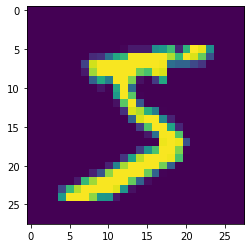

In [ ]:
# Load MNIST Data set.
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print("train_images[0] shape: ",train_images[0].shape)
#show the first image.
plt.imshow(train_images[0])

In [ ]:
def reshape_img(data):
  nsamples , nx , ny = data.shape
  return data.reshape(data.shape[0], nx, ny,1).astype('float32') / 255.0

In [ ]:
#train_img = reshape_img(train_images)
#test_img = reshape_img(test_images)
print(train_images.shape)
#train_img = (train_img - 127.5) / 127.5  # Normalize the images to [-1, 1]
# train_data = tf.data.Dataset.from_tensor_slices(train_images.astype(np.float32))
# train_data = train_data.shuffle(buffer_size=60000).batch(128,drop_remainder=True)

print(train_images.shape)

(60000, 28, 28)
(60000, 28, 28)


In [ ]:
train_images_as_output = train_images.reshape([-1, 28 * 28]).astype(np.float32)
train_images_as_output.shape
train_data = tf.data.Dataset.from_tensor_slices(train_images_as_output.astype(np.float32))
train_data = train_data.shuffle(buffer_size=60000).batch(128,drop_remainder=True)

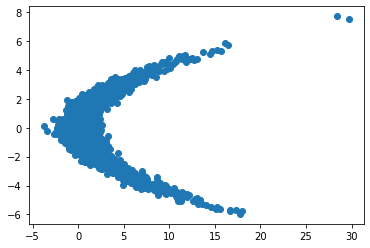

In [ ]:
# you can use x_samples as a toy dataset to train your first flow!
batch_size = 2048
x2_dist = tfd.Normal(loc=0., scale=2.)
x2_samples = x2_dist.sample(batch_size)
x1 = tfd.Normal(loc=.5 * tf.square(x2_samples),
                scale=tf.ones(batch_size, dtype=tf.float32))
x1_samples = x1.sample()
x_samples = tf.stack([x1_samples, x2_samples], axis=1)

as_np = x_samples.numpy()
plt.scatter(as_np[:, 0], as_np[:, 1])
plt.show() 

In [ ]:
x_samples

<tf.Tensor: shape=(2048, 2), dtype=float32, numpy=
array([[ 3.499959  , -2.5687819 ],
       [ 3.5913177 ,  2.13033   ],
       [10.671287  ,  4.516391  ],
       ...,
       [ 0.78314865,  1.1094197 ],
       [ 3.402577  ,  2.606371  ],
       [ 2.0504384 ,  2.8179305 ]], dtype=float32)>

In [ ]:
x1_samples

<tf.Tensor: shape=(2048,), dtype=float32, numpy=
array([ 3.499959  ,  3.5913177 , 10.671287  , ...,  0.78314865,
        3.402577  ,  2.0504384 ], dtype=float32)>

In [ ]:
def get_m():
  inputs = tf.keras.Input(shape=(784,), name="digits")
  x = tf.keras.layers.Dense(64, activation="relu")(inputs)
  x = tf.keras.layers.Dense(128, activation="relu")(x)
  outputs = tf.keras.layers.Dense(784, name="predictions")(x)
  model = tf.keras.Model(inputs=inputs, outputs=outputs)
  model.summary()
  return model

In [ ]:
model_mnist = get_m()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
predictions (Dense)          (None, 784)               101136    
Total params: 159,696
Trainable params: 159,696
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def get_model_m():
  inputs = tf.keras.Input(shape=(1,), name="test")
  x = tf.keras.layers.Dense(64, activation="relu")(inputs)
  x = tf.keras.layers.Dense(128, activation="relu")(x)
  outputs = tf.keras.layers.Dense(1, name="predictions")(x)
  model = tf.keras.Model(inputs=inputs, outputs=outputs)
  model.summary()
  return model

  return 


In [ ]:
#dimension = (2048,1)#(2048,1)
#dimension = (2, )

In [ ]:
model_test = get_model_m()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
test (InputLayer)            [(None, 1)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
predictions (Dense)          (None, 1)                 129       
Total params: 8,577
Trainable params: 8,577
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_samples.shape

TensorShape([2048, 2])

In [ ]:
tf.shape(x_samples).numpy()

array([2048,    2], dtype=int32)

In [ ]:
x1,x2 = tf.split(x_samples, num_or_size_splits=2,axis=1)

print(x1.shape)
#x1 = tf.reshape(x1,[-1])
#print(x1.shape)

(2048, 1)


In [ ]:
x1.shape

TensorShape([2048, 1])

In [ ]:
y = model_test(x1)
y

<tf.Tensor: shape=(2048, 1), dtype=float32, numpy=
array([[-0.3940155 ],
       [-0.40430042],
       [-1.2013434 ],
       ...,
       [-0.08816466],
       [-0.3830525 ],
       [-0.23083259]], dtype=float32)>

In [ ]:
def f_typeA(data,mod):
  x1, x2 = tf.split(data,num_or_size_splits=2,axis=-1)

  out1 = x1
  out2 = x1 + mod(x2)

  return tf.concat([out1,out2],axis=-1)

In [ ]:
def f_typeB(data,mod):

  x1,x2 = tf.split(data,num_or_size_splits=2,axis=-1)

  out1 = x1 + mod(x2)
  out2 = x2

  return tf.concat([out1,out2],axis=-1)


In [ ]:
def b_typeA(data,mod):
  x1, x2 = tf.split(data,num_or_size_splits=2,axis=-1)

  out1 = x1
  out2 = x1 - mod(x2)

  return tf.concat([out1,out2],axis=-1)

In [ ]:
def b_typeB(data,mod):

  x1,x2 = tf.split(data,num_or_size_splits=2,axis=-1)

  out1 = x1 - mod(x2)
  out2 = x2

  return tf.concat([out1,out2],axis=-1)

In [ ]:
def forward(mod,data,num_layers=4):

  for _ in range(num_layers):
    data = f_typeA(data,mod)
    data = f_typeB(data,mod)
  
  return data


In [ ]:
def backward(mod,data,num_layers=4):

  for _ in range(num_layers):
    data = b_typeA(data,mod)
    data = b_typeB(data,mod)
  
  return data

In [ ]:
tf.round(tf.subtract(x_samples, backward(model_test,forward(model_test,x_samples))))

<tf.Tensor: shape=(2048, 2), dtype=float32, numpy=
array([[ 0., -6.],
       [ 0., -2.],
       [ 0., -6.],
       ...,
       [ 0.,  0.],
       [ 0., -1.],
       [ 0.,  1.]], dtype=float32)>

In [ ]:
forward(model_test,x_samples,1)

<tf.Tensor: shape=(2048, 2), dtype=float32, numpy=
array([[ 3.1820858 ,  2.8236027 ],
       [ 3.2140162 ,  3.3514912 ],
       [ 9.527182  , 10.162844  ],
       ...,
       [ 0.70904434,  0.6582533 ],
       [ 3.0525565 ,  3.109159  ],
       [ 1.8553193 ,  1.7332038 ]], dtype=float32)>

In [ ]:
backward(model_test,x_samples,1)

<tf.Tensor: shape=(2048, 2), dtype=float32, numpy=
array([[ 3.9701169,  4.1763153],
       [ 4.022617 ,  3.831144 ],
       [11.929869 , 11.179729 ],
       ...,
       [ 0.8853737,  0.908044 ],
       [ 3.8186617,  3.6959949],
       [ 2.3169844,  2.367673 ]], dtype=float32)>

In [ ]:
x = backward(model_test,forward(model_test,x_samples,1),1)
x

<tf.Tensor: shape=(2048, 2), dtype=float32, numpy=
array([[ 3.5761013 ,  3.499959  ],
       [ 3.6183167 ,  3.5913177 ],
       [10.728525  , 10.671287  ],
       ...,
       [ 0.797209  ,  0.78314865],
       [ 3.435609  ,  3.402577  ],
       [ 2.0861518 ,  2.0504384 ]], dtype=float32)>

In [ ]:
x_samples

<tf.Tensor: shape=(2048, 2), dtype=float32, numpy=
array([[ 3.499959  , -2.5687819 ],
       [ 3.5913177 ,  2.13033   ],
       [10.671287  ,  4.516391  ],
       ...,
       [ 0.78314865,  1.1094197 ],
       [ 3.402577  ,  2.606371  ],
       [ 2.0504384 ,  2.8179305 ]], dtype=float32)>

In [ ]:
t_sub = tf.reshape(tf.round(tf.subtract(x,x_samples)),[-1])

In [ ]:
tf.math.count_nonzero(t_sub)

<tf.Tensor: shape=(), dtype=int64, numpy=1608>

In [ ]:
#forward_optimizer = tf.keras.optimizers.Adam(0.0001)
#backward_optimizer = tf.keras.optimizers.Adam(0.0001)
optimizer = tf.keras.optimizers.Adam(0.0001)

In [ ]:
def train_steps(mod,num_steps,training_data,dims):

  base_dist = tfd.MultivariateNormalDiag(tf.zeros(dims, tf.float32))
  #for step, (x_batch_train) in enumerate(training_data):
  step = 0
  while step < num_steps:
    with tf.GradientTape() as tape:
      #print(training_data.shape)
      h = forward(mod,training_data)
      log_prob = base_dist.log_prob(h)
      #print(log_prob.shape)
      loss = - tf.reduce_mean(log_prob)

      gradients = tape.gradient(loss, mod.trainable_variables)
      #print("gradient: ",gradients)
      #gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

      optimizer.apply_gradients(zip(gradients, mod.trainable_variables))
      #discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

      step += 1

      if step % 100 == 0:
        print("Step:{} Loss:{}".format(step,loss))


In [ ]:
h = forward(model_test,x_samples)
h

<tf.Tensor: shape=(2048, 2), dtype=float32, numpy=
array([[2.3163912, 2.2883804],
       [2.3441486, 2.314823 ],
       [6.950729 , 6.863328 ],
       ...,
       [0.5164099, 0.5101082],
       [2.2257195, 2.19802  ],
       [1.3513601, 1.3348484]], dtype=float32)>

In [ ]:
model_test.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
test (InputLayer)            [(None, 1)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
predictions (Dense)          (None, 1)                 129       
Total params: 8,577
Trainable params: 8,577
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#x_sample_data = tf.data.Dataset.from_tensor_slices(x_samples)
#x_sample_data = train_data.shuffle(buffer_size=60000).batch(128,drop_remainder=True)

In [ ]:
#tf.split(x_sample_data,num)
#x1,x2 = tf.split(x_sample_data, num_or_size_splits=2,axis=1)
#x1

In [ ]:
train_steps(model_test,10000,x_samples,dims=2)

Step:100 Loss:2.566383123397827
Step:200 Loss:2.2195849418640137
Step:300 Loss:2.217954158782959
Step:400 Loss:2.217451810836792
Step:500 Loss:2.217010259628296
Step:600 Loss:2.216583728790283
Step:700 Loss:2.2161502838134766
Step:800 Loss:2.2156829833984375
Step:900 Loss:2.21513032913208
Step:1000 Loss:2.214433431625366
Step:1100 Loss:2.212859630584717
Step:1200 Loss:2.210726737976074
Step:1300 Loss:2.2063939571380615
Step:1400 Loss:2.2006397247314453
Step:1500 Loss:2.192195415496826
Step:1600 Loss:2.1788246631622314
Step:1700 Loss:2.16025447845459
Step:1800 Loss:2.1428515911102295
Step:1900 Loss:2.1335251331329346
Step:2000 Loss:2.1279382705688477
Step:2100 Loss:2.124020576477051
Step:2200 Loss:2.1215720176696777
Step:2300 Loss:2.1199653148651123
Step:2400 Loss:2.11820912361145
Step:2500 Loss:2.1170263290405273
Step:2600 Loss:2.109692096710205
Step:2700 Loss:2.1027135848999023
Step:2800 Loss:2.0970828533172607
Step:2900 Loss:2.0922162532806396
Step:3000 Loss:2.084989070892334
Step:31